# Text Mining Twitter App
### Danny Lam
#### May 14, 2020

In [1]:
#import libraries after installing in my terminal
import twitter
import tweepy as tweepy
from tweepy import OAuthHandler, Stream

#import other required libraries
import os
import pandas as pd
import numpy as np

#import for plotting and visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display

## Accessing Twitter API

In [2]:
#authorizing an application to access Twitter account data
#required keys and tokens from Twitter developer 

access_token = '1255683454408130562-jH2wa5pPqcDKGXjU7xExxnczhv8HST'
access_secret = '72oYCT9HYijUvJRI4nAqKZLlCd3JIWbnqi3UfLDzp3n1F'
consumer_key = '78TTkzvFY6DvYO4TC1k6Cic2A'
consumer_secret = 'J9RKSUg8nzIa5M2toeiNZincj8T9dB4ayqnKESIEusjfamxKO0'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
twitter_api = tweepy.API(auth)

# Nothing to see by displaying twitter_api except that it's now a
# defined variable

print(twitter_api)

## Searching for tweets from Twitter
- Search for recent tweets using the #KobeBryant hashtag
- I used the .Cursor method to get an object containing tweets containing the hashtag #KobeBryant
- Iterator attributes include: the text in tweet, user, and date

In [3]:
#define variables of what I wanted to search about and the date
search_words = "#KobeBryant"
date_since = "2020-02-20"

In [4]:
#use .Cursor() to search twitter for tweets containing the search term #cheesecake
#restrict returned tweets by using .items() method
#.items(10) will return the 10 recent tweets

#collect tweets
tweets = tweepy.Cursor(twitter_api.search,
              q=search_words,
              lang="en",
              since=date_since).items(10)

#check if cursor works
tweets


In [5]:
#collect tweets
tweets = tweepy.Cursor(twitter_api.search,
              q=search_words,
              lang="en",
              since=date_since).items(10)

#iterate and print tweets
#this code loops through the object and prints the text associated with each tweet
for tweet in tweets:
    print(tweet.text)
    

#you can also use this method to collect a list of tweets
#[tweet.text for tweet in tweets]

I was watching Kobe last game, so I stared to think, why Good people are dying? There is a lot bad people who hurt… https://t.co/DEWcSdrC4h
Seeing this replay of #KobeBryant last game on @ABCnetwork , aside from missing him, it’s painful to watch. Seeing… https://t.co/Myc0ZjBZKW
I'm always told God has a reason for everything, but I still don't why Kobe Bryant (along with his daughter the sev… https://t.co/fdgikvN9dT
I'm watching @kobebryant farewell game on @ABCNetwork  and it's still amazing what he did in that game #KobeBryant
Man this #KobeBryant farewell game replay has me way too into my feelings seeing him and his girls on the sideline #Lakers #RIPKobeBryant
The #KobeBryant farewell game is just ridiculous. I remember watching it live. Rewatching it again is just still cr… https://t.co/sLghTRujlD
RT @Tawny_Kitaen: 💕A new #tawnystake is up &amp; running now! Go to YouTube &amp; enjoy!! #giannabryant #kobebryant my hero’s, I can’t even imagine…
This #KobeBryant farewell game puts 

## Filter out retweets
- Removing retweets will eliminate duplicate content that might skew the analysis if i will only be looking at word frequency
- Use -filter:retweets to ignore retweets

In [6]:
#new variable for words without retweets
new_search = search_words + " -filter:retweets"
new_search

'#KobeBryant -filter:retweets'

In [7]:
#check new tweets with retweets filtered out
tweets = tweepy.Cursor(twitter_api.search,
                       q=new_search,
                       lang="en",
                       since=date_since).items(500)

#display new search with no retweets
all_tweets = [tweet.text for tweet in tweets]
all_tweets[:5]

['I was watching Kobe last game, so I stared to think, why Good people are dying? There is a lot bad people who hurt… https://t.co/DEWcSdrC4h',
 'Seeing this replay of #KobeBryant last game on @ABCnetwork , aside from missing him, it’s painful to watch. Seeing… https://t.co/Myc0ZjBZKW',
 "I'm always told God has a reason for everything, but I still don't why Kobe Bryant (along with his daughter the sev… https://t.co/fdgikvN9dT",
 "I'm watching @kobebryant farewell game on @ABCNetwork  and it's still amazing what he did in that game #KobeBryant",
 'Man this #KobeBryant farewell game replay has me way too into my feelings seeing him and his girls on the sideline #Lakers #RIPKobeBryant']

## Which users tweeted?
- I will find out who is tweeting about #KobeBryant , their location, and follower count
- tweet.user.screen_name provides the user’s twitter username 
- tweet.user.location gives the user’s provided location
- tweet.user.followers_count gives the followers count

In [49]:
#define tweets to collect 500 tweets
tweets = tweepy.Cursor(twitter_api.search, 
                           q=new_search,
                           lang="en",
                           since=date_since).items(500)

#define users_locs to fill parameters for username, location, and their follower count
users_locs = [[tweet.user.screen_name, tweet.user.location,tweet.user.followers_count] for tweet in tweets]
#only view the top 10
users_locs[:10]

[['KirstenGilling', '', 108],
 ['Munchie_Mcfly', 'West Baltimore, Maryland', 333],
 ['omer_kamba', 'Washington, DC', 49],
 ['coolmanolo', 'Miami, FL', 3100],
 ['kevinlockett', 'Akron, OH', 5221],
 ['deontherealmvp', '', 463],
 ['acmartin33', 'SPRINGFIELD, MO, KC, MO', 274],
 ['NateBreen', 'IA', 365],
 ['kevinrice1', 'Atlanta, Ga', 322],
 ['DiegoGarcesTV', '', 4013]]

## Pandas Dataframe
- Load the list of tweets into a dataframe

In [50]:
#create a dataframe called tweet_df
tweet_df = pd.DataFrame(data=users_locs, 
                    columns=['Twitter User', "Location","Follow Count"])
tweet_df.head(10)

,Twitter User,Location,Follow Count
0,KirstenGilling,,108
1,Munchie_Mcfly,"West Baltimore, Maryland",333
2,omer_kamba,"Washington, DC",49
3,coolmanolo,"Miami, FL",3100
4,kevinlockett,"Akron, OH",5221
5,deontherealmvp,,463
6,acmartin33,"SPRINGFIELD, MO, KC, MO",274
7,NateBreen,IA,365
8,kevinrice1,"Atlanta, Ga",322
9,DiegoGarcesTV,,4013


## Remove URLs
- I will use regular expression to remove unwanted characters and URLs

In [10]:
#import regular expression library
import re

In [11]:
#define remove_url function to remove the url using regex
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [51]:
#after defining function, you can call it in a list comprehension to create a list of the clean tweet
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]

#search for the 10 most recent tweets
all_tweets_no_urls[:10]

['I was watching Kobe last game so I stared to think why Good people are dying There is a lot bad people who hurt',
 'Seeing this replay of KobeBryant last game on ABCnetwork aside from missing him its painful to watch Seeing',
 'Im always told God has a reason for everything but I still dont why Kobe Bryant along with his daughter the sev',
 'Im watching kobebryant farewell game on ABCNetwork and its still amazing what he did in that game KobeBryant',
 'Man this KobeBryant farewell game replay has me way too into my feelings seeing him and his girls on the sideline Lakers RIPKobeBryant',
 'The KobeBryant farewell game is just ridiculous I remember watching it live Rewatching it again is just still cr',
 'This KobeBryant farewell game puts me in awe every time I see it especially his will as he finishes off the last',
 'SHAQs face when KobeBryant scored that jumper again the utahjazz in his Last game as a Lakers PRICELESS',
 'Lifelong celtics fan watching Kobes last game with goosebump

## Change case sensitivity
- I will change all text to lowercase for cleaner analysis
- This will ensure that each word will be unique/distinct

In [52]:
#split the words from one tweet into unique elements
#use string method .lower() to get all lowercase words
all_tweets_no_urls[0].lower().split()

['i',
 'was',
 'watching',
 'kobe',
 'last',
 'game',
 'so',
 'i',
 'stared',
 'to',
 'think',
 'why',
 'good',
 'people',
 'are',
 'dying',
 'there',
 'is',
 'a',
 'lot',
 'bad',
 'people',
 'who',
 'hurt']

In [14]:
#create a list of lists containing lowercase words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]

#let's just display the top 3 tweets
words_in_tweet[:3]

[['i',
  'was',
  'watching',
  'kobe',
  'last',
  'game',
  'so',
  'i',
  'stared',
  'to',
  'think',
  'why',
  'good',
  'people',
  'are',
  'dying',
  'there',
  'is',
  'a',
  'lot',
  'bad',
  'people',
  'who',
  'hurt'],
 ['seeing',
  'this',
  'replay',
  'of',
  'kobebryant',
  'last',
  'game',
  'on',
  'abcnetwork',
  'aside',
  'from',
  'missing',
  'him',
  'its',
  'painful',
  'to',
  'watch',
  'seeing'],
 ['im',
  'always',
  'told',
  'god',
  'has',
  'a',
  'reason',
  'for',
  'everything',
  'but',
  'i',
  'still',
  'dont',
  'why',
  'kobe',
  'bryant',
  'along',
  'with',
  'his',
  'daughter',
  'the',
  'sev']]

## Word Frequency
- I will calculate the count of each word that appears in my sample
- Use itertools to flatten the list, so all words across the tweets are in one list

In [15]:
#import itertools for visualization
import itertools

#import collections library to deal with collections
import collections

In [53]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

[('kobebryant', 305),
 ('the', 258),
 ('kobe', 196),
 ('to', 143),
 ('of', 130),
 ('a', 110),
 ('and', 93),
 ('in', 93),
 ('bryant', 85),
 ('i', 84),
 ('is', 77),
 ('nba', 71),
 ('for', 68),
 ('on', 65),
 ('this', 54)]

In [54]:
#create dataframe for analysis and plotting for top 15 words
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

,words,count
0,kobebryant,305
1,the,258
2,kobe,196
3,to,143
4,of,130


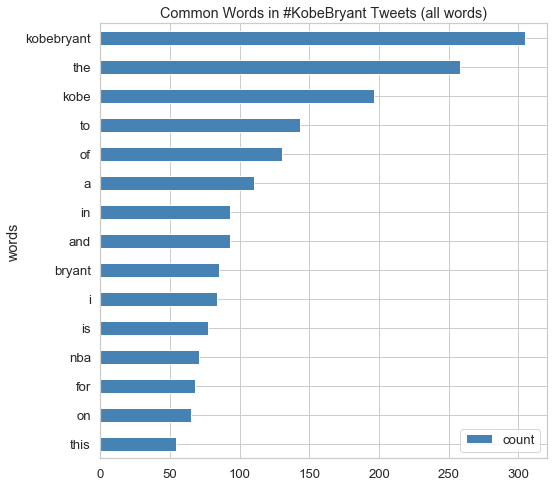

In [55]:
#create horizontal bar graph with top 15 common words
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(8, 8))


#plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="SteelBlue")

ax.set_title("Common Words in #KobeBryant Tweets (all words)")

#display plot
plt.show()

## Remove stopwords
- Stop words can include words like who, what, is, on, you, i, to, my

In [19]:
#import nltk to deal with natural processing language
import nltk
from nltk.corpus import stopwords

In [20]:
#provides a list of stopwords to use to clean Twitter data
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dannylam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
stop_words = set(stopwords.words('english'))

#view 20 words from the set
list(stop_words)[0:20]

['if',
 'herself',
 'having',
 'under',
 'each',
 'our',
 'ourselves',
 "don't",
 'other',
 'below',
 'yourself',
 's',
 'this',
 "weren't",
 'the',
 'your',
 'up',
 'or',
 'had',
 'both']

In [56]:
#remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

#display first tweet with no stop words
tweets_nsw[0]

['watching',
 'kobe',
 'last',
 'game',
 'stared',
 'think',
 'good',
 'people',
 'dying',
 'lot',
 'bad',
 'people',
 'hurt']

In [57]:
#use itertools to return most commonly used words and their count
all_words_nsw = list(itertools.chain(*tweets_nsw))

#this gets the count of the common words
counts_nsw = collections.Counter(all_words_nsw)

#display 15 most common words
counts_nsw.most_common(15)

[('kobebryant', 305),
 ('kobe', 196),
 ('bryant', 85),
 ('nba', 71),
 ('crash', 53),
 ('lakers', 52),
 ('helicopter', 44),
 ('mamba', 43),
 ('game', 38),
 ('basketball', 38),
 ('sports', 35),
 ('pilot', 30),
 ('last', 28),
 ('autopsy', 27),
 ('academy', 24)]

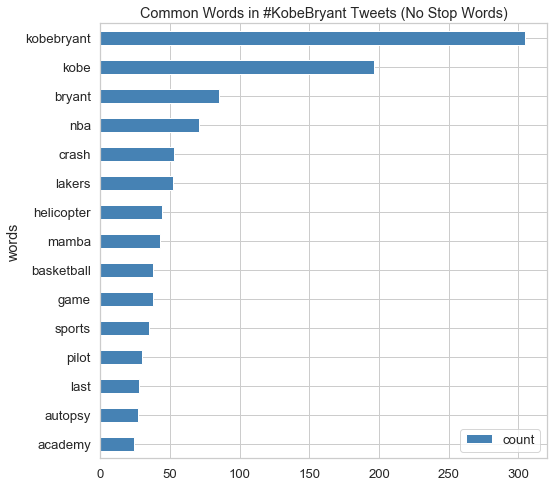

In [58]:
#now we will recreate the plot, but now without any stopwords
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="SteelBlue")

ax.set_title("Common Words in #KobeBryant Tweets (No Stop Words)")

plt.show()

## Remove collection words
- Collection words are words used to query data from Twitter
- Removing these collections words will better clean the data for frequency analysis

In [25]:
collection_words = ['kobe', 'bryant', 'kobebryant', 'bryants']
tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

In [59]:
#here is a tweet before removing collection words
tweets_nsw[2]

['im',
 'always',
 'told',
 'god',
 'reason',
 'everything',
 'still',
 'dont',
 'kobe',
 'bryant',
 'along',
 'daughter',
 'sev']

In [27]:
#after we remove the collection words, there is no more kobebryant words
tweets_nsw_nc[2]

['im',
 'always',
 'told',
 'god',
 'reason',
 'everything',
 'still',
 'dont',
 'along',
 'daughter',
 'sev']

## Word frequency with Clean Tweets
- Now the data is clean from stop words and collection words
- I will flatten the list and create a counter for the words

In [28]:
#flatten list of words in clean tweets
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))

#create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

#display 15 common words
counts_nsw_nc.most_common(15)

[('nba', 71),
 ('crash', 53),
 ('lakers', 52),
 ('helicopter', 44),
 ('mamba', 43),
 ('game', 38),
 ('basketball', 38),
 ('sports', 35),
 ('pilot', 30),
 ('last', 28),
 ('autopsy', 27),
 ('academy', 24),
 ('time', 23),
 ('espn', 20),
 ('drugs', 19)]

In [29]:
#find the amount of unique words across all tweets
len(counts_nsw_nc)

1950

In [30]:
#create dataframe of words and count
clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(15),
                             columns=['words', 'count'])
clean_tweets_ncw.head(15)

,words,count
0,nba,71
1,crash,53
2,lakers,52
3,helicopter,44
4,mamba,43
5,game,38
6,basketball,38
7,sports,35
8,pilot,30
9,last,28


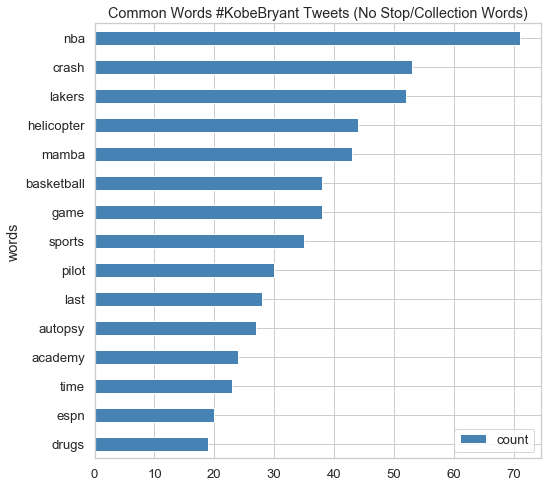

In [31]:
#plot 15 most common words with all clean data
fig, ax = plt.subplots(figsize=(8, 8))

#plot horizontal bar graph
clean_tweets_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="SteelBlue")

ax.set_title("Common Words #KobeBryant Tweets (No Stop/Collection Words)")

plt.show()

## Pandas dataframe

In [32]:
#create a dataframe so we can do some visualizations
#define tweets to collect 500 tweets
tweets2 = tweepy.Cursor(twitter_api.search, 
                           q=new_search,
                           lang="en",
                           since=date_since).items(500)


TDF = [[remove_url(tweet.text),
        len(tweet.text),
        tweet.created_at,
        tweet.source,
        tweet.user.screen_name, 
        tweet.favorite_count,
        tweet.retweet_count] for tweet in tweets2]

#only view the top 5 
TDF[:5]

[['I was watching Kobe last game so I stared to think why Good people are dying There is a lot bad people who hurt',
  139,
  datetime.datetime(2020, 5, 17, 2, 46, 16),
  'Twitter for iPhone',
  'omer_kamba',
  1,
  0],
 ['Seeing this replay of KobeBryant last game on ABCnetwork aside from missing him its painful to watch Seeing',
  139,
  datetime.datetime(2020, 5, 17, 2, 46),
  'Twitter for iPhone',
  'coolmanolo',
  0,
  0],
 ['Im always told God has a reason for everything but I still dont why Kobe Bryant along with his daughter the sev',
  140,
  datetime.datetime(2020, 5, 17, 2, 45, 59),
  'Twitter for Android',
  'kevinlockett',
  0,
  0],
 ['Im watching kobebryant farewell game on ABCNetwork and its still amazing what he did in that game KobeBryant',
  114,
  datetime.datetime(2020, 5, 17, 2, 44, 37),
  'Twitter for Android',
  'deontherealmvp',
  0,
  0],
 ['Man this KobeBryant farewell game replay has me way too into my feelings seeing him and his girls on the sideline Lakers

In [33]:
#create a dataframe called tweet_df
tweet_DF = pd.DataFrame(data=TDF, 
                    columns=['Tweets',
                             'Length',
                             'Date',
                             'Source',
                             'User',
                             'Likes',
                             'RTs'])

tweet_DF.head(10)

,Tweets,Length,Date,Source,User,Likes,RTs
0,I was watching Kobe last game so I stared to t...,139,2020-05-17 02:46:16,Twitter for iPhone,omer_kamba,1,0
1,Seeing this replay of KobeBryant last game on ...,139,2020-05-17 02:46:00,Twitter for iPhone,coolmanolo,0,0
2,Im always told God has a reason for everything...,140,2020-05-17 02:45:59,Twitter for Android,kevinlockett,0,0
3,Im watching kobebryant farewell game on ABCNet...,114,2020-05-17 02:44:37,Twitter for Android,deontherealmvp,0,0
4,Man this KobeBryant farewell game replay has m...,137,2020-05-17 02:44:27,Twitter for iPhone,acmartin33,0,0
5,The KobeBryant farewell game is just ridiculou...,140,2020-05-17 02:44:23,Twitter for Android,NateBreen,0,0
6,This KobeBryant farewell game puts me in awe e...,139,2020-05-17 02:43:59,Twitter for iPhone,kevinrice1,0,0
7,SHAQs face when KobeBryant scored that jumper ...,112,2020-05-17 02:43:47,Twitter for iPhone,DiegoGarcesTV,1,0
8,Lifelong celtics fan watching Kobes last game ...,140,2020-05-17 02:41:44,Twitter for Android,MattyVaught,3,1
9,Just watching KobeBryant drop 60 in his last g...,132,2020-05-17 02:40:50,Twitter for iPhone,DKscout22,2,1


## Visualization and basic statistics

In [34]:
#extract the mean of length
mean = tweet_DF['Length'].mean()

print("The average tweet length is: {} characters".format(mean))

The average tweet length is: 122.864 characters


In [35]:
#create time series for data:
tlen = pd.Series(data=tweet_DF['Length'].values, index=tweet_DF['Date'])
tfav = pd.Series(data=tweet_DF['Likes'].values, index=tweet_DF['Date'])
tret = pd.Series(data=tweet_DF['RTs'].values, index=tweet_DF['Date'])

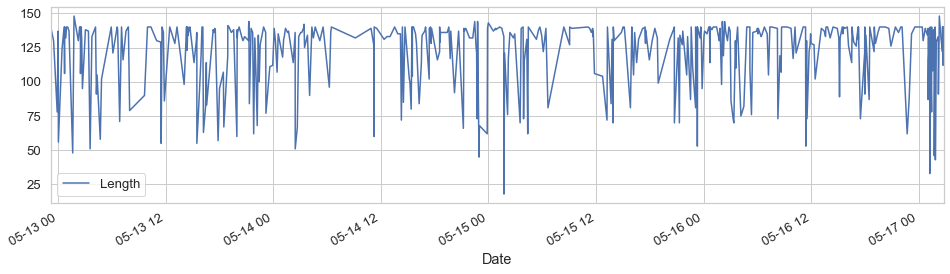

In [36]:
#tweet lengths from 5/13/20 to 5/17/20
tlen.plot(figsize=(16,4), color='b',label="Length", legend=True);

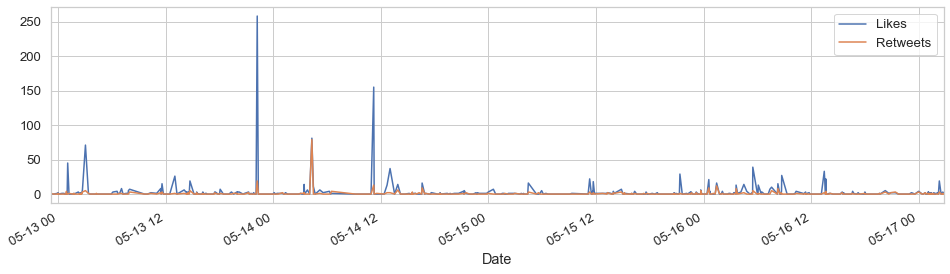

In [37]:
#likes vs retweets visualization
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

- above, we see one tweet that has really high likes on 5/14/20
- next, i will find more info on this tweet by locating the idxmax

In [38]:
#locate the max amount of likes
tweet_DF.loc[tweet_DF['Likes'].idxmax]

Tweets    KobeBryant is in my top 6AllTime Period
Length                                         68
Date                          2020-05-13 22:13:12
Source                         Twitter for iPhone
User                                realtuffjuice
Likes                                         258
RTs                                            19
Name: 381, dtype: object

In [46]:
#258 likes is the highest
#locate the info of the highest liked tweet
tweet_DF.loc[tweet_DF['Likes']==258]

,Tweets,Length,Date,Source,User,Likes,RTs,SA
381,KobeBryant is in my top 6AllTime Period,68,2020-05-13 22:13:12,Twitter for iPhone,realtuffjuice,258,19,1


In [40]:
#obtain all possible sources:
sources = []
for source in tweet_DF['Source']:
    if source not in sources:
        sources.append(source)

#print sources in a groupby function
print("Creation of content sources:")
tweet_DF.groupby('Source').sum()

Creation of content sources:


,Length,Likes,RTs
Source,,,
Blog2Social APP,412,3,1
Buffer,353,1,1
Create Buzz Media Account,84,0,2
Crowdfire App,140,1,0
DataScienceInfo,121,0,1
Dynamic Tweets,456,1,0
Echobox,272,2,0
Etsy,132,0,0
Hootsuite Inc.,1067,13,3


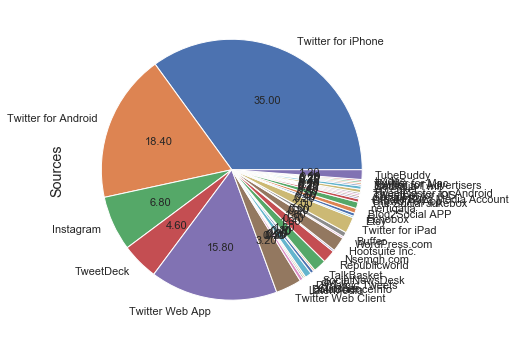

In [41]:
#create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in tweet_DF['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

#pie chart for sources
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

- From these visualizations, we can conclude that people tweeted #KobeBryant..
- 35% from their iPhones
- 18.4% from an Androids
- 15.8% from the web
- 6.8% from Instagram
- 4.6% from TweetDeck

## Sentimental Analysis
- first, i installed textblob on my computer using: pip install -U textblob
- this will allow me to use sentiment analysis on my twitter data

In [42]:
from textblob import TextBlob
import re

#declare function to clean the tweets from unwanted characters and links
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

#declare function to classify polarity of a tweet using textblob
def analize_sentiment(tweet):
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [43]:
#create a new column with the result of the analysis
tweet_DF['SA'] = np.array([ analize_sentiment(tweet) for tweet in tweet_DF['Tweets'] ])

#display the updated dataframe with the new column:
display(tweet_DF.head(10))

,Tweets,Length,Date,Source,User,Likes,RTs,SA
0,I was watching Kobe last game so I stared to t...,139,2020-05-17 02:46:16,Twitter for iPhone,omer_kamba,1,0,-1
1,Seeing this replay of KobeBryant last game on ...,139,2020-05-17 02:46:00,Twitter for iPhone,coolmanolo,0,0,-1
2,Im always told God has a reason for everything...,140,2020-05-17 02:45:59,Twitter for Android,kevinlockett,0,0,0
3,Im watching kobebryant farewell game on ABCNet...,114,2020-05-17 02:44:37,Twitter for Android,deontherealmvp,0,0,-1
4,Man this KobeBryant farewell game replay has m...,137,2020-05-17 02:44:27,Twitter for iPhone,acmartin33,0,0,-1
5,The KobeBryant farewell game is just ridiculou...,140,2020-05-17 02:44:23,Twitter for Android,NateBreen,0,0,-1
6,This KobeBryant farewell game puts me in awe e...,139,2020-05-17 02:43:59,Twitter for iPhone,kevinrice1,0,0,-1
7,SHAQs face when KobeBryant scored that jumper ...,112,2020-05-17 02:43:47,Twitter for iPhone,DiegoGarcesTV,1,0,1
8,Lifelong celtics fan watching Kobes last game ...,140,2020-05-17 02:41:44,Twitter for Android,MattyVaught,3,1,-1
9,Just watching KobeBryant drop 60 in his last g...,132,2020-05-17 02:40:50,Twitter for iPhone,DKscout22,2,1,-1


In [44]:
#verify the sentiment analysis results by counting the amount of postive, neutral, and negatives tweets
#make lists with classified tweets
positive_tweets = [ tweet for index, tweet in enumerate(tweet_DF['Tweets']) if tweet_DF['SA'][index] > 0]
neutral_tweets = [ tweet for index, tweet in enumerate(tweet_DF['Tweets']) if tweet_DF['SA'][index] == 0]
negative_tweets = [ tweet for index, tweet in enumerate(tweet_DF['Tweets']) if tweet_DF['SA'][index] < 0]

In [45]:
#extract the percentages
print("Positive tweets: {}%".format(len(positive_tweets)*100/len(tweet_DF['Tweets'])))
print("Neutral tweets: {}%".format(len(neutral_tweets)*100/len(tweet_DF['Tweets'])))
print("Negative tweets: {}%".format(len(negative_tweets)*100/len(tweet_DF['Tweets'])))

Positive tweets: 34.8%
Neutral tweets: 47.6%
Negative tweets: 17.6%


## Deriving conlusion

- From the recent #KobeBryant tweets, we see that people are still tweeting about his helicopter crash

In [60]:
clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(15),
                             columns=['words', 'count'])
clean_tweets_ncw.head(15)

,words,count
0,nba,71
1,crash,53
2,lakers,52
3,helicopter,44
4,mamba,43
5,game,38
6,basketball,38
7,sports,35
8,pilot,30
9,last,28
